In [8]:
from keras.datasets import mnist
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [7]:
pip install keras tensorflow


  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/8d/44/c604ecc5c9993b6574a681f2f505e980725871a89cfd9e48597b12ccb506/keras-3.3.3-py3-none-any.whl.metadata
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for rich from https://files.pythonhosted.org/packages/87/67/a37f6214d0e9fe57f6ae54b2956d550ca8365857f42a1ce0392bb21d9410/rich-13.7.1-py3-none-any.whl.metadata
  Obtaining dependency information for namex from https://files.pythonhosted.org/packages/73/59/7854fbfb59f8ae35483ce93493708be5942ebb6328cd85b3a609df629736/namex-0.0.8-py3-none-any.whl.metadata
  

In [9]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(y_train.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000,) (10000,)


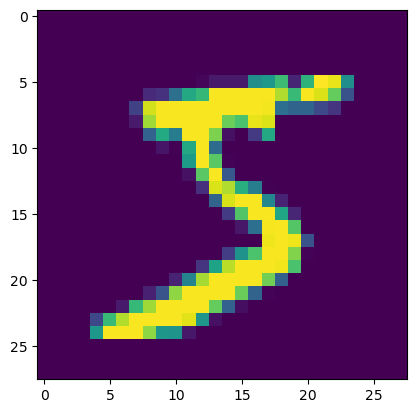

In [10]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[0])

In [11]:
#check image shape
X_train[0].shape

(28, 28)

In [12]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
print(X_train.shape)

(60000, 28, 28, 1)


In [13]:
#X_test = X_test.reshape(10000,...,...,...)
X_test = X_test.reshape(10000,28,28,1)

In [18]:
from keras.utils import to_categorical
#one-hot encode target column
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)
print("y_train[0]:", y_train[0])
print("y_train_onehot[0]:", y_train_onehot[0])

y_train[0]: 5
y_train_onehot[0]: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [15]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
num_filters = 8
filter_size = 3
pool_size = 2

In [16]:
#defining the model
model = Sequential()
#add model layers
model = Sequential([
 Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
 MaxPooling2D(pool_size=pool_size),
 Flatten(),
 Dense(10, activation='softmax'),
])

c:\Users\WENCIO DANIEL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [19]:
#train the model
model.fit(X_train, y_train_onehot, validation_data=(X_test, y_test_onehot), epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8319 - loss: 4.0695 - val_accuracy: 0.9294 - val_loss: 0.5779
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9439 - loss: 0.4006 - val_accuracy: 0.9404 - val_loss: 0.4020
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9552 - loss: 0.2397 - val_accuracy: 0.9377 - val_loss: 0.3337


In [20]:
#predict all images in the test set, and look at first 4
pred_probs = model.predict(X_test)
pred_probs[:4]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[2.94734358e-18, 3.65085598e-19, 5.01880818e-13, 1.64243176e-07,
        7.53115248e-20, 1.74788465e-16, 9.92454657e-27, 9.99999881e-01,
        6.83286761e-13, 1.55716863e-11],
       [7.35001867e-20, 2.76906409e-22, 1.00000000e+00, 5.02928656e-19,
        2.80025732e-33, 2.06256393e-22, 1.03679425e-14, 0.00000000e+00,
        3.36465832e-21, 2.30179003e-30],
       [3.58371700e-11, 9.99993086e-01, 1.68176300e-08, 2.67485278e-09,
        1.13584102e-08, 1.04713479e-07, 5.87589755e-09, 1.05505578e-07,
        6.57169585e-06, 6.68695321e-08],
       [1.00000000e+00, 6.31392256e-17, 6.88632795e-09, 4.35053957e-13,
        6.81921812e-26, 2.04206132e-13, 4.84479731e-12, 5.04404997e-16,
        5.96172547e-12, 7.19926614e-13]], dtype=float32)

In [21]:
pred_classes = np.argmax(pred_probs,axis=1)
pred_classes[:4]

array([7, 2, 1, 0], dtype=int64)

In [22]:
#actual results for first 4 images in test set
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)